In [1]:
import sys
sys.path.append("../data/saved_models/")
sys.path.append("../model_scripts/")
sys.path.append("../utils/")
import os
import json

import numpy as np
import torch

import matplotlib.pyplot as plt
import fig3_plots

import fig3_analysis as rnn
import basic_analysis as basic
import model_utils
from task import generate_batch

import scipy
from scipy import stats
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter1d
from scipy.spatial import distance as dist

In [2]:
# file paths
data_folder = f"../data/saved_models/2d_2map/"
save_folder = f"../figures/fig3_plots/"

if os.path.isdir(save_folder):
    print('save folder exists')
else:
    os.mkdir(save_folder)
    
# font sizes
title_size = 10

save folder exists


In [3]:
# get the model IDs for all saved models
model_IDs = os.listdir(data_folder)

# select example model
ex_id = 2
model_ID = model_IDs[ex_id]

In [29]:
# get sample rnn data
inputs, outputs, targets = model_utils.sample_rnn_data(data_folder, model_ID)
X, map_targ, pos_targ = model_utils.format_rnn_data(outputs["hidden_states"],\
                                                    targets["map_targets"],\
                                                    targets["pos_targets"])

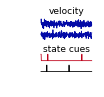

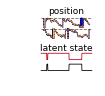

In [5]:
''' Figure 3A: model schematic '''
f, gs = fig3_plots.plot_a1(inputs["inp_vel"],\
                          inputs["inp_remaps"])
plt.show()
f.savefig(f'{save_folder}inputs.png', dpi=600, bbox_inches='tight')

f, gs = fig3_plots.plot_a2(targets["pos_targets"],\
                          outputs["pos_outputs"],\
                          outputs["map_logits"])
plt.show()
f.savefig(f'{save_folder}outputs.png', dpi=600, bbox_inches='tight')

mean +/- standard error of the mean:
position loss: 0.0361 +/- 0.000718
context loss: 0.00196 +/- 2.19e-05


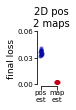

In [6]:
''' summary performance across models '''
f, ax = fig3_plots.plot_supp_1(data_folder, model_IDs)
ax.set_title('2D pos\n2 maps', fontsize=title_size, pad=5)
plt.show()

C:\Users\ilow1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ilow1\Anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


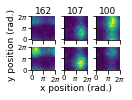

In [35]:
''' Figure 3B: example tuning '''
f, axes = fig3_plots.plot_b(X, map_targ, pos_targ)
plt.show()
f.savefig(f'{save_folder}ex_tuning.png', dpi=600, bbox_inches='tight')

C:\Users\ilow1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ilow1\Anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


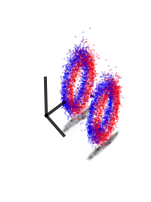

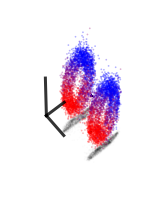

In [8]:
''' Figure 3C: aligned toroidal manifolds'''
f, ax = fig3_plots.plot_c(X, pos_targ, map_targ, 
                            num_points=4000,
                            color_x=True)
ax.view_init(azim=140, elev=40)
plt.show()
f.savefig(f'{save_folder}manifolds_xpos.png', dpi=600, bbox_inches='tight')

f, ax = fig3_plots.plot_c(X, pos_targ, map_targ, 
                            num_points=4000,
                            color_x=False)
ax.view_init(azim=140, elev=40)
plt.show()
f.savefig(f'{save_folder}manifolds_ypos.png', dpi=600, bbox_inches='tight')

on average, 4 PCs explain 48.64% of the variance
on average, 24 PCs explain 89.96% of the variance
on average, 3 PCs explain 40.73% of the variance within each map


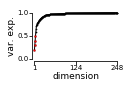

In [9]:
''' Figure 3D: summary of dimensionality '''
f, axes = fig3_plots.plot_d(data_folder, model_IDs,
                            top_num=4, top_num_1=3)
plt.show()
f.savefig(f'{save_folder}PCs_all.png', dpi=600, bbox_inches='tight')

C:\Users\ilow1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ilow1\Anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


mean alignment = 0.25
sem misalignment = 0.0056


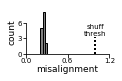

In [10]:
''' Figure 3E: summary of torus alignment '''
f, ax = fig3_plots.plot_e(data_folder, model_IDs)
f.savefig(f'{save_folder}alignment.png', dpi=600, bbox_inches='tight')
plt.show()

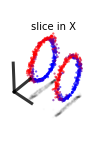

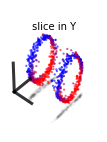

In [11]:
''' Figure 3F: slices showing aligned rings 
subsample holding x or y constant to get a slice in each direction and plot the aligned rings
'''
title_size = 10

# slice from a fixed Y position
X_slice, pos_targ_slice, _ = rnn.get_slice_data(data_folder, model_ID, fix_x=False)
f, ax = fig3_plots.plot_f(X_slice, 
                          pos_targ_slice[np.abs(pos_targ_slice) > 0])
ax.set_title('slice in X',
              fontsize=title_size, pad=-10)
plt.show()
f.savefig(f'{save_folder}slices_xpos.png', dpi=600, bbox_inches='tight')

# slice from a fixed X position
X_slice, pos_targ_slice, _ = rnn.get_slice_data(data_folder, model_ID, fix_x=True)
f, ax = fig3_plots.plot_f(X_slice,
                          pos_targ_slice[np.abs(pos_targ_slice) > 0])
ax.set_title('slice in Y',
              fontsize=title_size, pad=-10)
plt.show()
f.savefig(f'{save_folder}slices_ypos.png', dpi=600, bbox_inches='tight') 

C:\Users\ilow1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ilow1\Anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


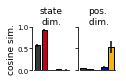

In [27]:
''' Figure 3g: alignment to remapping dim and position subspace '''
f, ax = fig3_plots.plot_g(data_folder, model_IDs)
plt.show()
f.savefig(f'{save_folder}dim_angles.png', dpi=600, bbox_inches='tight')